패키지 참조 -> 데이터 셋 준비 -> 데이터 전처리 -> 탐색적 데이터 분석 -> 데이터 셋 분할 -> 모델 개발 -> 학습 결과 평가 -> 학습 결과 적용

![res/code.png](res/code.png)

분석 프로세스를 진행한 이유와 해당 프로세서를 통해 얻은 결론을 설명
- 모든 단계는 목적과 근거를 제시

>머신러닝 - 소숫점 처리에 뛰어남

# 단순 선형 회귀 (학습성능개선)

`텐서플로우의 학습성능을 개선`하기 위해 아래의 기능을 사용할 수 있음

1. 데이터 표준화 : 학습률 향상에 도움을 줌
2. 콜백함수 : 모델의 학습 방향, 저장 시점, 학습 정지 시점 등에 관한 상황을 모니터링 하기 위한 도구

## 데이터 정규화(Normalization, 표준화)

### 1) 데이터 정규화의 이해

#### 데이터 정규화란?

모든 데이터가 동일한 정도의 스케일(중요도)로 반영되도록 해 주는 처리

#### 정규화를 해야 하는 이유

머신러닝 알고리즘은 데이터가 가진 feature(특성)들을 비교하여 데이터의 패턴을 찾는다.

이 때, 데이터가 가진 feature의 스케일이 심하게 차이가 나는 경우 수많은 학습 단계를 거쳐서 최적값에 도달하게 된다.

데이터에 정규화 처리를 적용하면 쉽게 최적값에 도달할 수 있으며 학습률을 상대적으로 높여서 사용할 수 있기 때문에 빠르게 훈련시킬 수 있다.

> 성능과 속도 개선을 위해 표준화를 진행

### 2) 데이터 정규화 방법

주로 standardscaler을 사용(상황에 따라서 더 좋은 패키지를 선택)

standardscaler은 범위가 아닌 분산 조정

minmax는 범위 조정

#### 최소-최대 정규화 (Min-Max Normalization)

모든 feature에 대해 각각의 최소값 0, 최대값 1로, 그리고 다른 값들은 0과 1 사이의 값으로 변환.

예를 들어 어떤 특성의 최소값이 20이고 최대값이 40인 경우, 30이라는 데이터가 있을 경우,
20은 `0`, 40은 `1`로 환산되기 때문에 30은 중간치인 `0.5`로 변환됨.

## 콜백함수

모델의 학습 방향, 저장 시점, 학습 정지 시점 등에 관한 상황을 모니터링하기 위한 도구

### 콜백함수 사용 방법

#### 콜백 정의

```pyhon
callbacks = [  콜백1, 콜백2, ... 콜백n  ]
```

#### 학습을 위한 fit() 함수에서 callbacks 파라미터에 미리 정의한 리스트를 지정

```python
callbacks = [콜백1, 콜백2, ... , 콜백n]
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 500, callbacks = callbacks)
```

혹은

```python
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 500, callbacks = [
    콜백1, 콜백2, ... , 콜백n
])
```

### 콜백함수 종류

#### 1) `EarlyStopping()`

모델 학습 시에 지정된 기간 동안 모니터링하는 평가지표에서 더 이상 성능 향상이 일어나지 않은 경우 학습을 스스로 중단

EarlyStopping의 patience를 통해 epochs 제한 - epochs가 쓸데없이 많으면 오차 범위가 증가

```python
EarlyStopping(monitor='평가지표', patience=10, verbose=1)
```

- `patience` : 지정한 수만큼의 기간에서 평가지표의 향상이 일어나지 않을 경우 학습을 중단 (기간이라 함은 에폭을 의미)
예를 들어 patience=`10`일 때, `10`에폭 동안 성능 향상이 일어나지 않으면 학습을 중단. 즉, 10회 이상 성능향상이 발견되지 않으면 중단함
- `verbose` : 콜백의 수행 과정 노출 여부를 지정.
    * 0: 아무런 표시 하지 않음(기본값)
    * 1: 프로그래스바로 표시
    * 2: 매 에폭마다 수행과정을 자세하게 출력함.

#### 2) `ReduceLROnPlateau()`

EarlyStopping 콜백과 같이 patience 인자를 지정하여, 지정된 기간 동안 `평가지표에서 성능 향상이 일어나지 않으면 학습률을 조정하는 콜백`

```python
ReduceLROnPlateau(monitor='평가지표', factor=0.1, patience=10, min_lr=0, verbose=1)
```

- `factor` : 학습률 조정에 사용되는 값 (새로운 학습률 = factor * 기존 학습률)
- patience: 지정한 수만큼의 기간에서 성능 향상이 일어나지 않을 경우, 학습률을 조정
- `min_lr` : 학습률의 하한을 지정
- `verbose` : 콜백의 수행 과정 노출 여부를 지정.

#### 3) `ModelCheckpoint()`

지정한 평가지표를 기준으로 가장 뛰어난 성능을 보여주는 모델을 저장 할 때 사용

```python
ModelCheckpoint(filepath, monitor='평가지표', verbose=1, save_best_only=True|False, save_weights_only=False)
```

- `filepath` : 모델의 저장 경로를 지정
- `save_best_only` : True인 경우, 가장 성능이 뛰어난 모델만 저장. 그보다 좋지 않은 모델의 경우는 덮어쓰지 않는다.
- `save_weights_only` : 모델의 가중치만 저장

## #01. 패키지

In [27]:
import os
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense


#-------- 추가 패키지 --------#
# 데이터 정규화를 위한 패키지 참조
from sklearn.preprocessing import MinMaxScaler

# 학습에 대한 콜백함수 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

## #02. 데이터 준비

In [28]:
origin = read_excel('https://data.hossam.kr/E04/cars.xlsx')
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## #03. 데이터 전처리

### 결측치 확인

In [29]:
origin.isna().sum()

speed    0
dist     0
dtype: int64

> 결측치 없음

## #04. 탐색적 데이터 분석

### 기초통계 확인

describe

In [30]:
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


### (수정) 산점도 그래프와 추세선 확인

산점도, 추세선 확인 이유
- 단순선형, 다항식으로 갈지 여부를 결정 -> 곡선인 경우 다항식으로 분석
- 즉, 시각화 자료를 통한 차수 결정

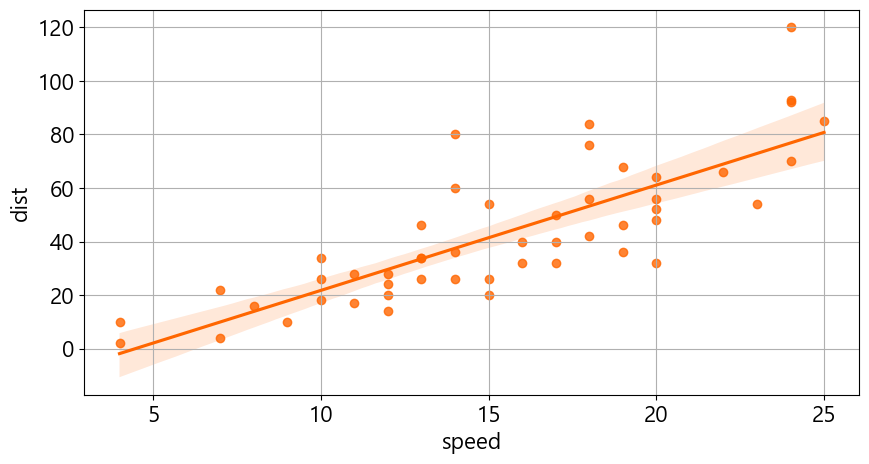

In [31]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
sb.regplot(data=origin, x='speed', y='dist', color='#ff6600')
plt.grid()

plt.show()
plt.close()

> 곡선보다는 `선형 분포(직선)`에 더 가까우므로 `단순선형회귀모델`을 적용

> 데이터의 범위는 `0~1` 사이로 변화했지만 전체적인 상관관계는 변하지 않았음을 알 수 있다.

## #05. 데이터셋 분할

### 1. 랜덤시드 고정

In [32]:
np.random.seed(777)

### 2. 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

데이터프레임은 2차원 형식

In [33]:
# (행 수, 열 수)
x = origin.drop(['dist'], axis=1)
y = origin[['dist']]
print("훈련데이터 크기 :", x.shape, "/ 레이블 크기 :", y.shape)

훈련데이터 크기 : (50, 1) / 레이블 크기 : (50, 1)


### (추가) 데이터 정규화(표준화) 수행

표준화는 2차원

차후 학습 결과 적용에서 스케일링 데이터를 사용해야하기 때문에 독립/종속 변수를 따로 스케일링

#### 독립변수 표준화

In [34]:
x_scaler = MinMaxScaler()
x_scale = x_scaler.fit_transform(x)
x_scale

array([[0.        ],
       [0.        ],
       [0.14285714],
       [0.14285714],
       [0.19047619],
       [0.23809524],
       [0.28571429],
       [0.28571429],
       [0.28571429],
       [0.33333333],
       [0.33333333],
       [0.38095238],
       [0.38095238],
       [0.38095238],
       [0.38095238],
       [0.42857143],
       [0.42857143],
       [0.42857143],
       [0.42857143],
       [0.47619048],
       [0.47619048],
       [0.47619048],
       [0.47619048],
       [0.52380952],
       [0.52380952],
       [0.52380952],
       [0.57142857],
       [0.57142857],
       [0.61904762],
       [0.61904762],
       [0.61904762],
       [0.66666667],
       [0.66666667],
       [0.66666667],
       [0.66666667],
       [0.71428571],
       [0.71428571],
       [0.71428571],
       [0.76190476],
       [0.76190476],
       [0.76190476],
       [0.76190476],
       [0.76190476],
       [0.85714286],
       [0.9047619 ],
       [0.95238095],
       [0.95238095],
       [0.952

#### 독립변수 표준화

In [35]:
y_scaler = MinMaxScaler()
y_scale = y_scaler.fit_transform(y)
y_scale

array([[0.        ],
       [0.06779661],
       [0.01694915],
       [0.16949153],
       [0.11864407],
       [0.06779661],
       [0.13559322],
       [0.20338983],
       [0.27118644],
       [0.12711864],
       [0.22033898],
       [0.10169492],
       [0.15254237],
       [0.18644068],
       [0.22033898],
       [0.20338983],
       [0.27118644],
       [0.27118644],
       [0.37288136],
       [0.20338983],
       [0.28813559],
       [0.49152542],
       [0.66101695],
       [0.15254237],
       [0.20338983],
       [0.44067797],
       [0.25423729],
       [0.3220339 ],
       [0.25423729],
       [0.3220339 ],
       [0.40677966],
       [0.33898305],
       [0.45762712],
       [0.62711864],
       [0.69491525],
       [0.28813559],
       [0.37288136],
       [0.55932203],
       [0.25423729],
       [0.38983051],
       [0.42372881],
       [0.45762712],
       [0.52542373],
       [0.54237288],
       [0.44067797],
       [0.57627119],
       [0.76271186],
       [0.771

### 3. 훈련 데이터와 검증 데이터로 분할

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, test_size = 0.3, random_state = 777)
print("훈련용 데이터셋 크기 : %d, 검증용 데이터셋 크기 : %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기 : 35, 검증용 데이터셋 크기 : 15


In [37]:
# 본인 추가 - 객체 확인
print("y_test :",type(y_test), "/", "x_test :", type(x_test))

y_test : <class 'numpy.ndarray'> / x_test : <class 'numpy.ndarray'>


## #06. 모델 개발

### 1. 모델 정의

- input_shape은 독립변수 수
- Dense 신경망 개수의 수에 따라서 모델의 성능에 차이가 발생
    - 직감으로 맞춤(다른 방법 없음) 보통 16 또는 32 이상
    - 최적의 값을 직접 탐색(단, 너무 크면 컴퓨터 다운)
- activation은 모델과 분석 종류에 따라서 다름 
    - 보통은 relu, 분류는 sigmoid, 회귀는 linear
- optimizer은 모르면 Adam 사용
- epochs는 많아도 크게 상관이 없음(단, 너무 크면 오래 걸림)
- 2차항을 하고 싶다면 sklearn으로 2차항 생성 후 Sequential에 입력

| 구분 | 모델 | 활성화 함수 | 옵티마이저 | 손실함수 | 평가지표 | 대표예제 |
|--|--|--|--|--|--|--|
| 논리연산 | 단층퍼셉트론 | linear | SGD | mse | acc | OR, AND Gate |
| 논리연산 | 다층퍼셉트론 | relu, sigmoid | RMSprop | mse | acc | XOR Gate |
| 회귀 | 단순선형회귀 | relu, linear | adam | mse | mae | |
| 회귀 | 다중선형회귀 | relu, relu, linear | adam | mse | ase | 보스턴 집값 예측 |
| 분류 | 이항분류(로지스틱 회귀) | [relu,] sigmoid | rmsporp | binary_crossentropy | acc | 타이타닉 생존률 예측 |
| 분류 | 다항분류(소프트맥스 회귀) | [relu, ...] softmax | adam 혹은 rmsprop | categorical_crossentropy | acc | iris 분류 |

In [38]:
model = Sequential()
# 1차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(32, activation = 'relu', input_shape = (1, )))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                64        
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (수정) 학습하기

- epochs는 많아도 크게 상관이 없음(단, 너무 크면 오래 걸리고 오차가 증가)
    - callback을 사용해 모델의 학습 방향, 저장 시점, 학습 정지 시점 등에 관한 상황을 모니터링
    - EarlyStopping 콜백과 같이 patience 인자를 지정하여, 지정된 기간 동안 `평가지표에서 성능 향상이 일어나지 않으면 학습률을 조정하는 콜백`
    - ReduceLROnPlateau EarlyStopping 콜백과 같이 patience 인자를 지정하여, 지정된 기간 동안 `평가지표에서 성능 향상이 일어나지 않으면 학습률을 조정하는 콜백`
    - ModelCheckpoint 지정한 평가지표를 기준으로 가장 뛰어난 성능을 보여주는 모델을 저장 할 때 사용

In [39]:
# result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))    #기존 코드

# 파일이 저장될 경로(폴더) 지정 이때 한글, 공백, 점(.)이 포함된 경우 에러가 발생
checkpoint_path = os.path.join("D:\\tensorflow_checkpoint\\model07-cp-{epoch:04d}-ckpt")

result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks=[
    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1),
    ModelCheckpoint(filepath = checkpoint_path, monitor = 'val_loss', verbose=1, save_best_only = True)
    # ModelCheckpoint(filepath = 'reg_check_point.h5', monitor = 'val_loss', verbose=1, save_best_only = True)
])

Epoch 1/500
1/2 [==============>...............] - ETA: 3s - loss: 0.3271 - mae: 0.5007
Epoch 1: val_loss improved from inf to 0.20214, saving model to D:\tensorflow_checkpoint\model07-cp-0001-ckpt


2/2 [==============================] - 9s 5s/step - loss: 0.3114 - mae: 0.4856 - val_loss: 0.2021 - val_mae: 0.3954 - lr: 0.0010
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2902 - mae: 0.4640
Epoch 2: val_loss improved from 0.20214 to 0.18686, saving model to D:\tensorflow_checkpoint\model07-cp-0002-ckpt
2/2 [==============================] - 3s 3s/step - loss: 0.2906 - mae: 0.4662 - val_loss: 0.1869 - val_mae: 0.3783 - lr: 0.0010
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2827 - mae: 0.4553
Epoch 3: val_loss improved from 0.18686 to 0.17225, saving model to D:\tensorflow_checkpoint\model07-cp-0003-ckpt
2/2 [==============================] - 3s 3s/step - loss: 0.2712 - mae: 0.4469 - val_loss: 0.1722 - val_mae: 0.3612 - lr: 0.0010
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2486 - mae: 0.4239
Epoch 4: val_loss improved from 0.17225 to 0.15830, saving model to D:\tensorflow_checkpoint\model07-cp-0004-ckpt
2/2 [==

### 학습결과 시각화

In [40]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,0.311382,0.485636,0.202144,0.395415,0.001000
2,0.290583,0.466159,0.186863,0.378318,0.001000
3,0.271151,0.446873,0.172245,0.361225,0.001000
4,0.251780,0.427297,0.158300,0.344150,0.001000
5,0.234213,0.408271,0.145263,0.327379,0.001000
6,0.216548,0.389860,0.133062,0.310936,0.001000
7,0.201058,0.372029,0.121790,0.295017,0.001000
8,0.185874,0.354430,0.111622,0.279840,0.001000
9,0.172108,0.337540,0.102273,0.265105,0.001000


## #07. 학습 결과 평가

시각화 결과가 모이지 않으면 `과적합`이므로 `스케일링 또는 데이터 추가`로 개선 진행.

또는, callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint로 성능 개선

### 1. 학습결과 시각화

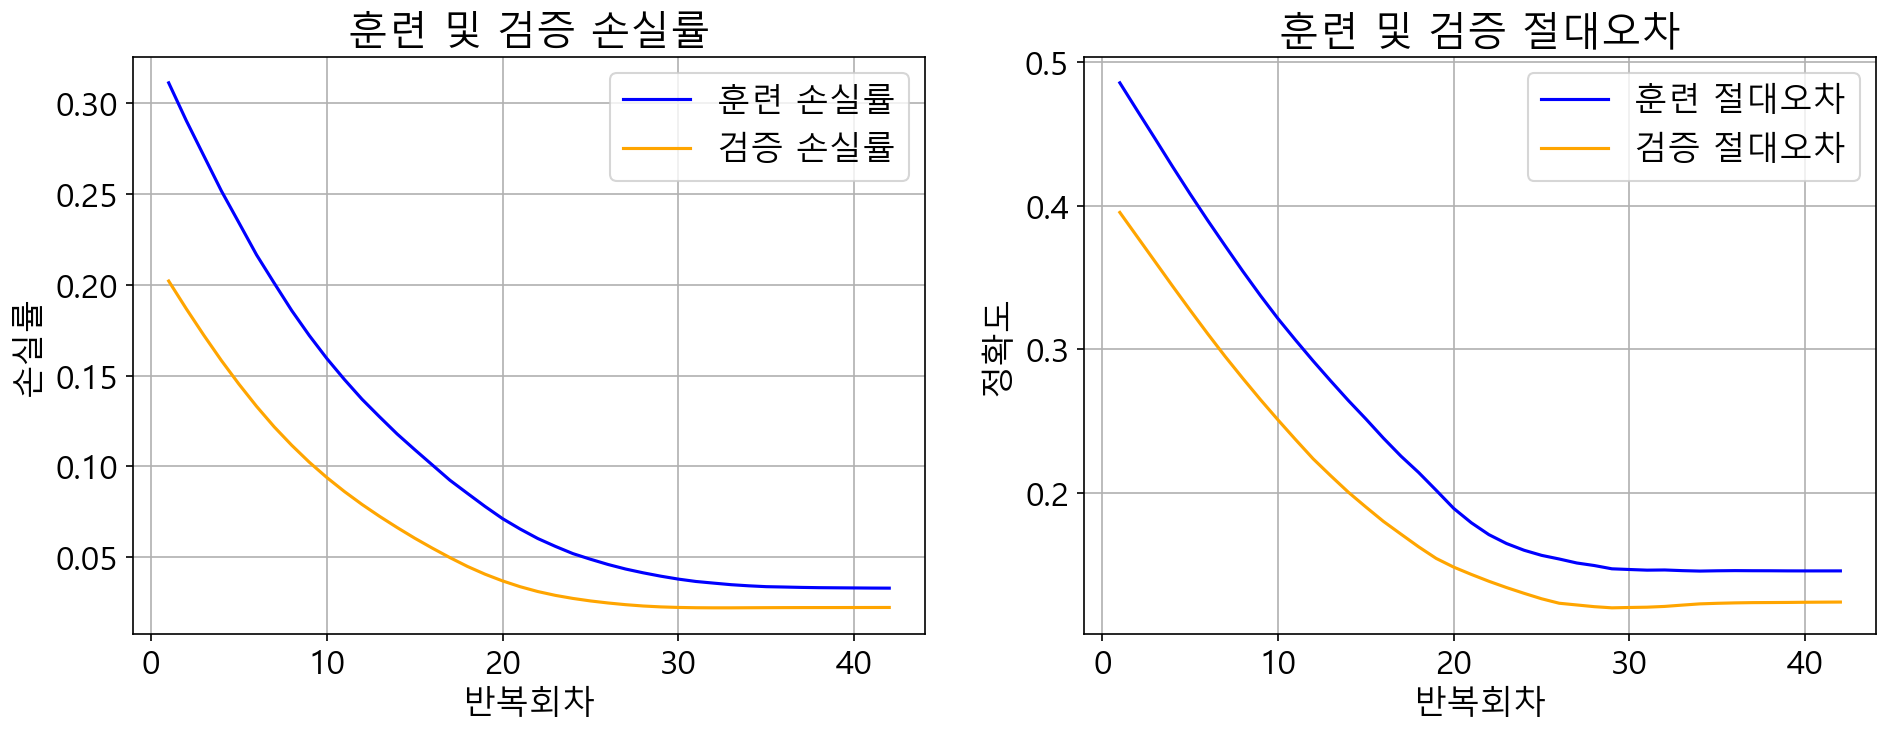

In [41]:
# --------------------
# 그래프 기본 설정
# --------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# --------------------
# 그래프를 그리기 위한 객체 생성
# --------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# --------------------
# 1) 훈련 및 검증 손실 그리기
# --------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# --------------------
# 2) 훈련 및 검증 절대오차 그리기
# --------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

> ephocs를 500으로 지정했지만 50회 전에 학습을 멈춘 것을 확인할 수 있다. 즉, `학습을 조기 종료`함으로서 `학습 성능을 향상`시켰다고 할 수 있다.

### 2. 모델 성능 평가

In [42]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률 : %f, 최종 훈련 절대오차 : %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률 : %f, 최종 검증 절대오차 : %f" % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 15ms/step - loss: 0.0328 - mae: 0.1459


최종 훈련 손실률 : 0.032820, 최종 훈련 절대오차 : 0.145852
1/1 [==============================] - 0s 151ms/step - loss: 0.0222 - mae: 0.1242
최종 검증 손실률 : 0.022204, 최종 검증 절대오차 : 0.124165


## #08. 학습 결과 적용

`통계`는 `데이터의 경향을 설명`, `머신러닝`은 `미래의 값을 예측`하는 것이 목적

### 1. 테스트 데이터에 대한 예측 결과 산정

In [43]:
results = model.predict(x_test)
print(results)

1/1 [==============================] - 0s 294ms/step
[[0.4397537 ]
 [0.33765137]
 [0.3274411 ]
 [0.31632864]
 [0.3989128 ]
 [0.34786156]
 [0.34786156]
 [0.38870254]
 [0.3274411 ]
 [0.3989128 ]
 [0.34786156]
 [0.409123  ]
 [0.25062227]
 [0.33765137]
 [0.17167504]]


### 2. 결과 데이터 셋 구성

표준화는 2차원, DF는 flatten

In [44]:
# y_test

In [45]:
print(type(x_test))

<class 'numpy.ndarray'>


In [46]:
kdf = DataFrame({
    '검증데이터': x_test.flatten(),
    '실제값': y_test.flatten(),
    '예측값' : results.flatten()
})

kdf['예측오차'] = kdf['실제값']-kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
0,0.904762,0.440678,0.439754,0.000924
1,0.428571,0.271186,0.337651,-0.066465
2,0.380952,0.101695,0.327441,-0.225746
3,0.333333,0.127119,0.316329,-0.189210
4,0.714286,0.372881,0.398913,-0.026031
5,0.476190,0.491525,0.347862,0.143664
6,0.476190,0.661017,0.347862,0.313155
7,0.666667,0.338983,0.388703,-0.049719
8,0.380952,0.152542,0.327441,-0.174899
9,0.714286,0.559322,0.398913,0.160409


### 3. 실제 결과값과 머신러닝에 의한 예측값 비교

머신러닝은 통계화는 다르게 실제 값보다 높게 예상하는 경향이 존재

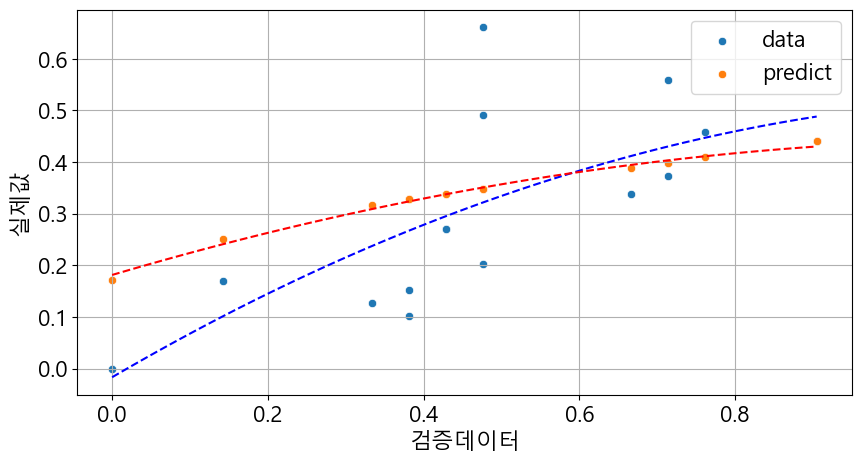

In [47]:
# 붉은색 - 예측 값, 푸른색 - 실제 값
helper.regplot(x_left=kdf['검증데이터'], y_left=kdf['실제값'], y_left_pred=kdf['예측값'])

### 3. 임의의 값에 대한 머신러닝 예측 결과

- 데이터를 스케일링 했기 때문에 입력하는 임의의 값도 스케일링해야함

`통계`는 `데이터의 경향을 설명`, `머신러닝`은 `미래의 값을 예측`하는 것이 목적

In [48]:
# 속도가 50일 때의 제동거리 예측
my_speed = 50

In [49]:
# 독립변수 표준화에 사용한 객체를 활용
my_speed_scale = x_scaler.transform([[my_speed]])
my_speed_scale

c:\Users\jehyu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[2.19047619]])

In [50]:
print(type(my_speed_scale))

<class 'numpy.ndarray'>


In [51]:
results = model.predict(my_speed_scale)
results

1/1 [==============================] - 0s 159ms/step


array([[0.7135192]], dtype=float32)

In [52]:
# 예측 결과는 표준화된 값으로 나오기 때문에 원래의 단위로 되돌리기 위해 역변환
y_scaler.inverse_transform(results)

array([[86.19527]], dtype=float32)

> 속력이 50일 경우 예측되는 제동거리는 99.53879